In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Load in csv
# df1 = pd.read_csv("data_bucketed.csv", encoding = 'utf-8')
# df1
k_df2 = pd.read_csv('data_states.csv').drop(['Unnamed: 0'],axis=1).sort_values(by=['quantity score'], ascending = False)
k_df2.rename(columns={"city":"City","quantity score":"Quantity score","business score":"Business Score"}, inplace=True)
k_df2.head(15)

,City,State,Quantity score,Business Score,Cost of Living Index,Bucket
194,San Francisco,California,29.14,3.8,178.6,5
183,New York,New York,11.43,3.8,128.0,3
189,Los Angeles,California,11.23,3.8,140.6,4
184,Boston,Massachusetts,5.50,3.8,132.6,3
128,Chicago,Illinois,4.37,3.8,100.1,2
181,Seattle,Washington,3.49,3.8,124.6,3
179,Washington,DC,3.47,3.8,120.1,3
166,Miami,Florida,3.21,3.8,110.1,2
155,Austin,Texas,3.20,3.8,106.6,2
118,Dallas,Texas,2.90,3.8,98.5,1


In [3]:
fig=px.line(k_df2,x='City',y='Quantity score')
fig.show()

In [4]:
k_df_bs = k_df2.sort_values(by=['Business Score'], ascending = False)

In [5]:
fig=px.line(k_df_bs,x='City',y='Business Score')
fig.show()

In [6]:
tp=k_df2.sort_values(by=['Cost of Living Index'],ascending = False)
fig=px.line(tp,x='City',y='Cost of Living Index')
fig.show()

In [7]:
bscol_sort = k_df2.sort_values(by=['Business Score','Quantity score'],ascending = False)
fig=go.Figure(data=[ 
    go.Bar(name='Quantity Score',x=bscol_sort['City'],y=bscol_sort['Quantity score']),
    go.Bar(name='Business Score',x=bscol_sort['City'],y=bscol_sort['Business Score']),
    go.Bar(name='Cost of Living',x=bscol_sort['City'],y=k_df2['Bucket'])

])
fig.update_layout(barmode='group')
fig.show()

In [8]:
k_df_bsb = k_df2.sort_values(by=['Business Score','Bucket'], ascending = False)
fig = px.bar(k_df_bsb, x = "City", y="Business Score", color = "Bucket", title="Business Score and Cost of Living")
fig.show()
# group these visually or only take the ones with max scores, we can then overlay the Qaultity Score

In [20]:
top_ten_df = k_df2.sort_values(by=['Business Score','Quantity score'], ascending = False).head(50)
top_ten_df.head(15)

,City,State,Quantity score,Business Score,Cost of Living Index,Bucket
194,San Francisco,California,29.14,3.8,178.6,5
183,New York,New York,11.43,3.8,128.0,3
189,Los Angeles,California,11.23,3.8,140.6,4
184,Boston,Massachusetts,5.50,3.8,132.6,3
128,Chicago,Illinois,4.37,3.8,100.1,2
181,Seattle,Washington,3.49,3.8,124.6,3
179,Washington,DC,3.47,3.8,120.1,3
166,Miami,Florida,3.21,3.8,110.1,2
155,Austin,Texas,3.20,3.8,106.6,2
118,Dallas,Texas,2.90,3.8,98.5,1


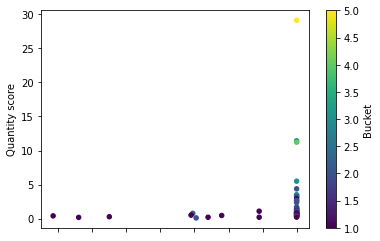

In [21]:
ax1 = top_ten_df.plot.scatter(
    x = 'Business Score',
    y = 'Quantity score',
    c = 'Bucket',
    colormap = 'viridis'
)

In [10]:
k_df_bsb = k_df2.sort_values(by=['Cost of Living Index'], ascending = False)
fig = go.Figure(data=[
    go.Bar(name='Quantity Score',x=k_df2['City'],y=k_df2['Quantity score']),
    go.Bar(name='Business Score',x=k_df2['City'],y=k_df2['Business Score']),
    go.Bar(name='Cost of Living',x=k_df2['City'],y=k_df2['Bucket'])
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

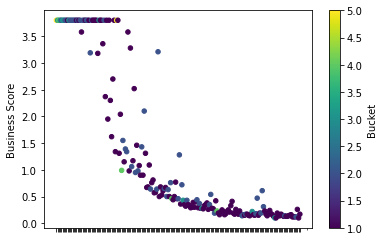

In [11]:
ax1 = k_df2.plot.scatter(
    x = 'City',
    y = 'Business Score',
    c = 'Bucket',
    colormap = 'viridis'
)